## Importing Libraries

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

## Requirements

You are going to train ridge regression using SGD.
Ridge regression has the cost function = MSE + alpha*||w||^2, where ||w|| is the Euclidean norm.
The goal is to find two optimal hyperparameters 1) learning rate of SGD and 2) alpha.

First, generate data like this:

np.random.seed(0)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.3 * X**2 + 2*np.random.randn(m, 1)
y = y.reshape((m))

Use the seed 0.

1. Randomly split the data into 80% training data and 20% testing data. Then split the training data again into 75% training data and 25% validation data. Keep this split fixed.

2. Use SGDRegressor(max_iter=1000, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=alpha, eta0=eta0)
What does this do? Comment on the choice of arguments above.
Here alpha and eta0 are the value you are going to provide as the regularization weight and the learning rate.

3. For each combinations of alphas = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1], eta0s = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1] 

(a) instantiate SGDRegressor,
(b) call fit(),
(c) call predict() and measure training and validation scores.

4. Report the training and validation error for each combination. Which combination has the smallest validation error?

5. Now use these hyperparameters to retrain the model from scratch using ALL training data (=train + validation sets).Plot the training and test error as a function of epochs. You might want to use SGDRegressor(max_iter=1, ... )

6. Report the test score or this final model, and also plot the test data vs final linear regression as a line.

## 0. Generating Data

In [2]:
# Generate 100 Data Points
np.random.seed(0)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.3 * X**2 + 2*np.random.randn(m, 1)
y = y.reshape((m))


## 1. Splitting Data

In [3]:
# Splitting data into train and test sets, and then training and validation sets
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
x_train_train, x_train_val, y_train_train, y_train_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

## 2. Creating Regression

This argument creates a Stochastic Gradient Descent Regressor. It will iterate a maximum of 1000 times, has no tolerance, and a seed of 0. `warm_start` uses the previous result as initialization for efficiency, and `penalty = "l2"` specifies the $\ell_{2}$ norm as the regularization function. `alpha` and `eta0` are the hyperparameters; `alpha` is the constant multiplied by the regularization term in the cost function, and `eta0` is the initial step size of the gradient descent.

## 3. Checking Parameters

In [4]:
# List of parameters
alphaparams = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1]
etaparams = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1]

# Empty list for results
resultlist = []

# Iterate through parammeters
for a in range(len(alphaparams)):
  for e in range(len(etaparams)):
    # Instantiate Regressor
    descent_regressor = SGDRegressor(max_iter=1000, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=alphaparams[a], eta0=etaparams[e])
    # Fit on training data, get MSE
    descent_regressor.fit(x_train_train, y_train_train)
    descent_training_prediction = descent_regressor.predict(x_train_train)
    train_error = mean_squared_error(descent_training_prediction, y_train_train)
    # Fit on validation data, get MSE
    descent_val_prediction = descent_regressor.predict(x_train_val)
    val_error = mean_squared_error(descent_val_prediction, y_train_val)
    # Save parameters and error to table
    resultlist.append([alphaparams[a], etaparams[e], train_error, val_error])



## 4. Tabulating Output and Finding Optimum

In [5]:
# Tabulate output
print(tabulate(resultlist, headers = ["ALPHA", "ETA", "TRAINING_ERROR", "VALIDATION_ERROR"]))

  ALPHA     ETA    TRAINING_ERROR    VALIDATION_ERROR
-------  ------  ----------------  ------------------
 1e-06   1e-06           15.0145             18.0474
 1e-06   1e-05            7.48338             9.19353
 1e-06   0.0001           4.15857             4.16563
 1e-06   0.001            4.15852             4.15663
 1e-06   0.01             4.2002              4.10589
 1e-06   0.1              4.82351             4.1234
 1e-05   1e-06           15.0145             18.0474
 1e-05   1e-05            7.48338             9.19354
 1e-05   0.0001           4.15857             4.16562
 1e-05   0.001            4.15852             4.15663
 1e-05   0.01             4.2002              4.10589
 1e-05   0.1              4.82351             4.12341
 0.0001  1e-06           15.0145             18.0474
 0.0001  1e-05            7.48339             9.19355
 0.0001  0.0001           4.15857             4.16561
 0.0001  0.001            4.15852             4.15661
 0.0001  0.01             4.2002

The best parameters are `alpha = 0.1`, `eta0 = 0.01`

In [6]:
# Finding minimum validation error
val_errors = [r[3] for r in resultlist]
min_error = min(val_errors)
min_index = val_errors.index(min_error)

print("The best combination: Alpha = %f, eta0 = %f, Training Error: %f, Testing Error: %f" %(resultlist[min_index][0],resultlist[min_index][1],resultlist[min_index][2],resultlist[min_index][3]))

The best combination: Alpha = 0.010000, eta0 = 0.010000, Training Error: 4.202686, Testing Error: 4.105827


## 5. Using Entire Training Dataset

In [7]:
# Creating Regressor
regressor_opt = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=0.1, eta0=0.01)

# Number of epochs
n_epochs = 10

# Create empty arrays
train_errors, val_errors = [],[]

# Run entire data set through regressor once per epoch
for epoch in range(n_epochs):
  regressor_opt.fit(x_train, y_train)
  y_train_predict = regressor_opt.predict(x_train_train)
  y_val_predict = regressor_opt.predict(x_train_val)
  train_errors.append(mean_squared_error(y_train_train, y_train_predict))
  val_errors.append(mean_squared_error(y_train_val, y_val_predict))
                                      

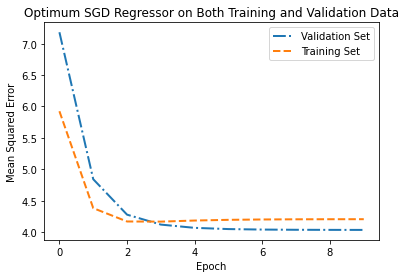

In [8]:
# Ploting validation and training MSE as epochs increase

plt.plot(val_errors, "-.", linewidth=2, label="Validation Set")
plt.plot(train_errors, "--", linewidth = 2, label = "Training Set")
plt.legend(loc = "upper right")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Optimum SGD Regressor on Both Training and Validation Data")
plt.show()


## 6. Results on Test Dataset

In [9]:
# Fitting to test data
y_test_pred = regressor_opt.predict(x_test)

# Calculating MSE
test_error = mean_squared_error(y_test_pred, y_test)

print("Overall Test MSE: %f" %(test_error))

Overall Test MSE: 4.526050


Text(0, 0.5, 'Y')

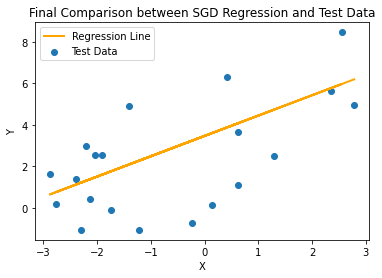

In [10]:
plt.scatter(x_test, y_test, label = "Test Data")
plt.plot(x_test, y_test_pred, linewidth = 2, color = "orange", label = "Regression Line")
plt.legend(loc = "upper left")
plt.title("Final Comparison between SGD Regression and Test Data")
plt.xlabel("X")
plt.ylabel("Y")